In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
senator_tweets = pd.read_csv("https://raw.githubusercontent.com/dshimshoni/TwitterIdeologicalSentiment/main/data_with_scores.csv")
senator_tweets = senator_tweets.drop("Unnamed: 0", axis=1)

In [3]:
senator_tweets.head()

,ids,date,senator,after_vote,text,tokens,cleaned_tweets,afinn_scores,vader_scores
0,1365451555076472836,2021-02-26 23:59:54,Joe Manchin,0,@f__of__x @angryprog @suchnerve Didn't Manchin...,"[""Didn't"", 'Manchin', 'and', 'Kyrsten', 'Sinem...",Didn't Manchin and Kyrsten Sinema say they wou...,2.0,-0.3089
1,1365451550261346305,2021-02-26 23:59:53,Joe Manchin,0,@JamaalBowmanNY Why are all the progressives s...,"['Why', 'are', 'all', 'the', 'progressives', '...",Why are all the progressives so comfortable ca...,0.0,-0.0463
2,1365451486881325056,2021-02-26 23:59:37,Joe Manchin,0,@CAAttorney1 @JuddLegum You seem certain Manch...,"['You', 'seem', 'certain', 'Manchin', 'will', ...",You seem certain Manchin will hold up a must-p...,-4.0,-0.4696
3,1365451462831083523,2021-02-26 23:59:32,Joe Manchin,0,@MiddleFWIW @BlueCheese911 @cenkuygur @BernieS...,"['Why', 'would', 'the', 'bill', 'fail', 'in', ...",Why would the bill fail in reconciliation? Do ...,-4.0,-0.8105
4,1365451442295775233,2021-02-26 23:59:27,Joe Manchin,0,@lorio808 @ACTBrigitte You could ask Steve man...,"['You', 'could', 'ask', 'Steve', 'manchineel',...",You could ask Steve manchineel daughter about ...,0.0,0.0000


In [4]:
senator_tweets.cleaned_tweets = senator_tweets.cleaned_tweets.str.lower()

In [5]:
## Since these tweets contain only links and tagging of twitter users, we will
## discount them from further analysis here

senator_tweets.loc[senator_tweets.cleaned_tweets.isna()]

,ids,date,senator,after_vote,text,tokens,cleaned_tweets,afinn_scores,vader_scores
174,1365808257764372480,2021-02-27 23:37:18,Joe Manchin,0,@IlhanMN https://t.co/W238H2c1SJ,[],NaN,0.0,0.0
175,1365808219071873028,2021-02-27 23:37:09,Joe Manchin,0,@IlhanMN https://t.co/W238H2c1SJ,[],NaN,0.0,0.0
176,1365808143700221954,2021-02-27 23:36:51,Joe Manchin,0,@RoKhanna @IlhanMN https://t.co/W238H2c1SJ,[],NaN,0.0,0.0
177,1365808078663385091,2021-02-27 23:36:36,Joe Manchin,0,@IlhanMN https://t.co/W238H2c1SJ,[],NaN,0.0,0.0
178,1365808015933399042,2021-02-27 23:36:21,Joe Manchin,0,@sunrisemvmt @IlhanMN @JoeBiden https://t.co/W...,[],NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8182,1367515778577289220,2021-03-04 16:42:23,Angus King,0,https://t.co/cYVY1H0V68,[],NaN,0.0,0.0
8206,1367490327674765326,2021-03-04 15:01:15,Angus King,0,https://t.co/rtoRgiKBaf,[],NaN,0.0,0.0
8210,1367477956478709763,2021-03-04 14:12:05,Angus King,0,https://t.co/5V0gkGbtxE,[],NaN,0.0,0.0
8575,1369690856379285510,2021-03-10 16:45:22,Angus King,1,https://t.co/SsJLsYPlmn,[],NaN,0.0,0.0


In [6]:
senator_tweets_considered = senator_tweets.loc[~senator_tweets.cleaned_tweets.isna()]

senator_tweets_before = senator_tweets_considered.loc[senator_tweets.after_vote == 0]
senator_tweets_after = senator_tweets_considered.loc[senator_tweets.after_vote == 1]
print(senator_tweets_before.shape)
print(senator_tweets_after.shape)

(3817, 9)
(4831, 9)


In [7]:
senator_tweets_before.head()

,ids,date,senator,after_vote,text,tokens,cleaned_tweets,afinn_scores,vader_scores
0,1365451555076472836,2021-02-26 23:59:54,Joe Manchin,0,@f__of__x @angryprog @suchnerve Didn't Manchin...,"[""Didn't"", 'Manchin', 'and', 'Kyrsten', 'Sinem...",didn't manchin and kyrsten sinema say they wou...,2.0,-0.3089
1,1365451550261346305,2021-02-26 23:59:53,Joe Manchin,0,@JamaalBowmanNY Why are all the progressives s...,"['Why', 'are', 'all', 'the', 'progressives', '...",why are all the progressives so comfortable ca...,0.0,-0.0463
2,1365451486881325056,2021-02-26 23:59:37,Joe Manchin,0,@CAAttorney1 @JuddLegum You seem certain Manch...,"['You', 'seem', 'certain', 'Manchin', 'will', ...",you seem certain manchin will hold up a must-p...,-4.0,-0.4696
3,1365451462831083523,2021-02-26 23:59:32,Joe Manchin,0,@MiddleFWIW @BlueCheese911 @cenkuygur @BernieS...,"['Why', 'would', 'the', 'bill', 'fail', 'in', ...",why would the bill fail in reconciliation? do ...,-4.0,-0.8105
4,1365451442295775233,2021-02-26 23:59:27,Joe Manchin,0,@lorio808 @ACTBrigitte You could ask Steve man...,"['You', 'could', 'ask', 'Steve', 'manchineel',...",you could ask steve manchineel daughter about ...,0.0,0.0000


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

before_tfidf = TfidfVectorizer(stop_words='english')
before_corpus_tfidf = before_tfidf.fit_transform(senator_tweets_before.cleaned_tweets.values)
before_tfidf_feats = before_tfidf.get_feature_names()

before_tfidf_array = before_corpus_tfidf.toarray()

before_tfidf_df = pd.DataFrame(before_tfidf_array, columns = before_tfidf_feats, index = senator_tweets_before.ids.values)

word_avg_before_tfidf = before_tfidf_df.mean(axis=0).sort_values(ascending=False)
word_avg_before_tfidf.head(50)

manchin            0.043252
sinema             0.035020
tester             0.020148
jon                0.019148
coons              0.018471
carper             0.018418
shaheen            0.017729
joe                0.017201
chris              0.017048
hassan             0.014476
king               0.014052
angus              0.013090
like               0.013068
vote               0.012766
maggie             0.012698
amp                0.012645
filibuster         0.012131
senate             0.011369
senators           0.011207
just               0.010566
don                0.010247
democrats          0.010044
senator            0.009437
need               0.009347
biden              0.009158
wage               0.009011
people             0.008596
15                 0.007970
think              0.007865
votes              0.007558
sen                0.007472
dems               0.007393
won                0.007305
minimum            0.006848
support            0.006761
pass               0

In [9]:
after_tfidf = TfidfVectorizer(stop_words='english')
after_corpus_tfidf = after_tfidf.fit_transform(senator_tweets_after.cleaned_tweets.values)
after_tfidf_feats = after_tfidf.get_feature_names()

after_tfidf_array = after_corpus_tfidf.toarray()

after_tfidf_df = pd.DataFrame(after_tfidf_array, columns = after_tfidf_feats, index = senator_tweets_after.ids.values)

word_avg_after_tfidf = after_tfidf_df.mean(axis=0).sort_values(ascending=False)
word_avg_after_tfidf.head(50)

mil           0.048231
manchin       0.040896
sinema        0.037233
coons         0.031093
carper        0.029981
king          0.029435
joe           0.029177
shaheen       0.028297
chris         0.027996
angus         0.027845
tester        0.027826
hassan        0.025963
jon           0.025947
nh            0.023851
maggie        0.023677
tom           0.022776
wage          0.022651
jeanne        0.021975
voted         0.020847
kyrsten       0.020020
minimum       0.019009
sen           0.018762
dump          0.018338
democrats     0.017388
15            0.015841
delaware      0.015236
vote          0.011936
amp           0.011884
wv            0.011691
az            0.011551
maine         0.011445
mt            0.011210
del           0.011157
million       0.011087
senators      0.010951
like          0.010733
new           0.010719
senator       0.010511
biden         0.010198
people        0.010068
senate        0.009926
just          0.009592
filibuster    0.009527
dems       

Vader Sentiment Scores Visualization

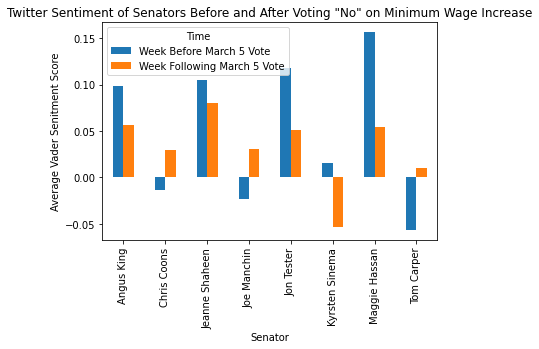

In [10]:
#Changed the dataframe a bit to make the graph labels nicer
senator_tweets.rename(columns={'after_vote': 'Time'},inplace=True)
senator_tweets['Time'] = np.where(senator_tweets['Time'] == 0, 'Week Before March 5 Vote', 'Week Following March 5 Vote')

senator_tweets.groupby(['senator','Time']).mean()['vader_scores'].unstack().plot(
    xlabel = 'Senator', 
    ylabel = 'Average Vader Senitment Score', 
    kind = 'bar',
    title = 'Twitter Sentiment of Senators Before and After Voting "No" on Minimum Wage Increase')




Afinn Sentiment Scores Visualization

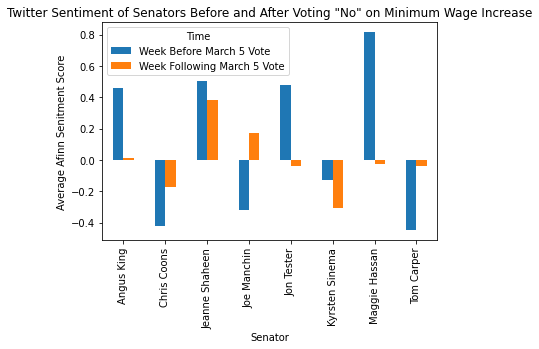

In [11]:
senator_tweets.groupby(['senator','Time']).mean()['afinn_scores'].unstack().plot(
    xlabel = 'Senator', 
    ylabel = 'Average Afinn Senitment Score', 
    kind = 'bar',
    title = 'Twitter Sentiment of Senators Before and After Voting "No" on Minimum Wage Increase')



In [12]:
vader_compare = senator_tweets.groupby(['senator','Time']).mean()['vader_scores'].unstack()
vader_compare['Difference'] = vader_compare['Week Following March 5 Vote'] - vader_compare['Week Before March 5 Vote']
vader_compare

Time,Week Before March 5 Vote,Week Following March 5 Vote,Difference
senator,,,
Angus King,0.098468,0.056750,-0.041718
Chris Coons,-0.014086,0.030012,0.044098
Jeanne Shaheen,0.104574,0.079974,-0.024600
Joe Manchin,-0.022806,0.030281,0.053087
Jon Tester,0.118110,0.051560,-0.066551
Kyrsten Sinema,0.015137,-0.052960,-0.068098
Maggie Hassan,0.156267,0.054421,-0.101846
Tom Carper,-0.056696,0.010011,0.066707


In [13]:
afinn_compare = senator_tweets.groupby(['senator','Time']).mean()['afinn_scores'].unstack()
afinn_compare['Difference'] = afinn_compare['Week Following March 5 Vote'] - afinn_compare['Week Before March 5 Vote']
afinn_compare

Time,Week Before March 5 Vote,Week Following March 5 Vote,Difference
senator,,,
Angus King,0.460843,0.011494,-0.449349
Chris Coons,-0.418919,-0.171937,0.246982
Jeanne Shaheen,0.502857,0.382857,-0.120000
Joe Manchin,-0.321429,0.174286,0.495714
Jon Tester,0.478261,-0.038636,-0.516897
Kyrsten Sinema,-0.127143,-0.307143,-0.180000
Maggie Hassan,0.814590,-0.026746,-0.841336
Tom Carper,-0.446667,-0.039062,0.407604


Overall T-Test of Vader Sentiment Distribution

In [14]:
# !pip install --upgrade scipy

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.1)


In [15]:
from scipy import stats

before_vader = senator_tweets_before['vader_scores']
after_vader = senator_tweets_after['vader_scores']

results = stats.ttest_ind(before_vader, after_vader, equal_var=False, alternative='greater')
print("Result of t-test for whether Vader sentiment of tweets decreased overall after the vote:")
results

Result of t-test for whether Vader sentiment of tweets decreased overall after the vote:


Ttest_indResult(statistic=1.2098207223617696, pvalue=0.11319140180941428)

Overall T-Test of Afinn Sentiment Distribution

In [16]:
before_afinn = senator_tweets_before['afinn_scores']
after_afinn = senator_tweets_after['afinn_scores']

results = stats.ttest_ind(before_afinn, after_afinn, equal_var=False, alternative='greater')
print("Result of t-test for whether Afinn sentiment of tweets decreased overall after the vote:")
results

Result of t-test for whether Afinn sentiment of tweets decreased overall after the vote:


Ttest_indResult(statistic=1.0105841996624922, pvalue=0.15612225426516688)

T-tests for individual senators

In [17]:
for senator in senator_tweets.senator.unique():
  before_tweets = senator_tweets_before.loc[senator_tweets_before.senator == senator]
  after_tweets = senator_tweets_after.loc[senator_tweets_after.senator == senator]
  vader_result = stats.ttest_ind(before_tweets['vader_scores'], after_tweets['vader_scores'], 
                                 equal_var=False, alternative='greater')
  print("Result of t-test for whether Vader sentiment score of tweets about Senator {} decreased overall after the vote:".format(senator))
  print(vader_result)
  afinn_result = stats.ttest_ind(before_tweets['afinn_scores'], after_tweets['afinn_scores'], 
                                 equal_var=False, alternative='greater')
  print("Result of t-test for whether Afinn sentiment score of tweets about Senator {} decreased overall after the vote:".format(senator))
  print(afinn_result)
  print("\n")

Result of t-test for whether Vader sentiment score of tweets about Senator Joe Manchin decreased overall after the vote:
Ttest_indResult(statistic=-2.0290124557325915, pvalue=0.9786755038913492)
Result of t-test for whether Afinn sentiment score of tweets about Senator Joe Manchin decreased overall after the vote:
Ttest_indResult(statistic=-2.7241224259965255, pvalue=0.996735131088415)


Result of t-test for whether Vader sentiment score of tweets about Senator Kyrsten Sinema decreased overall after the vote:
Ttest_indResult(statistic=2.7373087033922254, pvalue=0.0031367880955194575)
Result of t-test for whether Afinn sentiment score of tweets about Senator Kyrsten Sinema decreased overall after the vote:
Ttest_indResult(statistic=1.04490753300964, pvalue=0.1481237191675583)


Result of t-test for whether Vader sentiment score of tweets about Senator Jeanne Shaheen decreased overall after the vote:
Ttest_indResult(statistic=1.310392966517702, pvalue=0.09514109327869713)
Result of t-tes